In [1]:
# Importación de bibliotecas
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Subir la base de datos 
df=pd.read_csv("recursos_humanos.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Agregamos la condición 1 para que se filtrenlos datos y solo tener al departamento de "Sales"
condicion1=df["sales"]=="sales"
df=df[condicion1]
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14967,0.43,0.51,2,128,3,0,1,0,sales,low
14968,0.40,0.47,2,128,3,0,1,0,sales,medium
14969,0.43,0.46,2,157,3,0,1,0,sales,medium
14970,0.78,0.93,4,225,5,0,1,0,sales,medium


In [4]:
# Tambien removemos number_project ya quees necesario para análisis
df.drop(["sales","number_project"],axis=1, inplace=True )
df.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,157,3,0,1,0,low
1,0.80,0.86,262,6,0,1,0,medium
2,0.11,0.88,272,4,0,1,0,medium
3,0.72,0.87,223,5,0,1,0,low
4,0.37,0.52,159,3,0,1,0,low


In [5]:
# Se hacen dos bases de datos basados en si se fue o continuo 
R=df[df.left==1] # R de renuncio 
C=df[df.left==0] # C de continuo

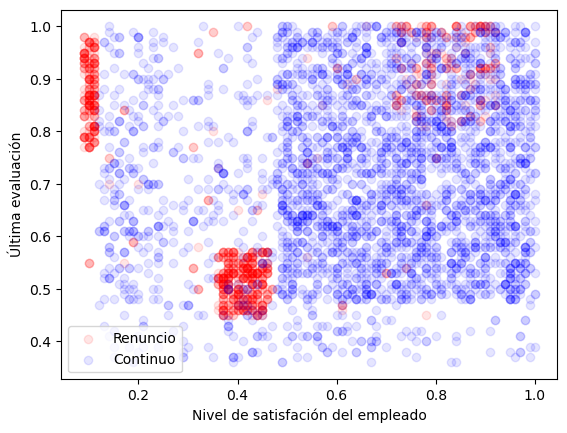

In [6]:
# Diagrama de disperción, se tomaron esta variables ya que el nivel de satisfación de los empleados es un do los más importantes para su retención
# Sin embargo tembien se considero el nivel del empleado segun sus evaluaciones para ver si es capaz de cumplir con el trabajo 
plt.scatter(R.satisfaction_level,R.last_evaluation, color="red", alpha=0.1, label="Renuncio")
plt.scatter(C.satisfaction_level,C.last_evaluation, color="blue", alpha=0.1, label="Continuo")
plt.xlabel("Nivel de satisfación del empleado")
plt.ylabel("Última evaluación")
plt.legend()
plt.show()

Como se puede observar hay tres grupos principales, el primero es empleados que tienen una alta evaluación es sus actividades, pero están altamente insatisfechos con su trabajo.

El segundo grupo que no tienen un alto rendimiento y que su satisfacción es aproximadamente la misma.

El tercer grupo que tienen un buen "performance", y que estas "satisfechos" en su lugar de trabajo. Este grupo podría renunciar por otras razones como lo son el salario. Sin embargo, este grupo también es el que menos "marcado" eta.


In [8]:
# Cambia los valores del salario a valores numericos
#  0= low(bajo), 1= medium (medio), 2= high(alto) 
df["salary"] = df["salary"].replace({"low": 0, "medium": 1, "high": 2})

In [9]:
# Asignamos los valores de "Y" y "X"
y=df["left"]
x=df.drop(["left"], axis=1)

In [10]:
# Creamos las bases de entrenamiento y prueba 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=1)

In [11]:
# Modelo KNN(K vecinos más cercanos)
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1) # En este caso entre mayor era el número de vecinos más bajo era el score 
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print ("Score: ",knn.score(x_test,y_test))

Score:  0.9468599033816425


In [37]:
# Calulamos la "Y" de predición y la real 
y_pred=prediction
y_true=y_test

In [13]:
#Creación de la matriz de confusiñon
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true, y_pred)
cm

array([[585,  34],
       [ 10, 199]], dtype=int64)

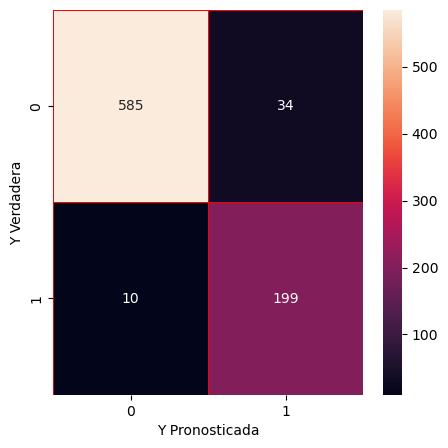

In [14]:
# Visualización de la matriz de confusión
import seaborn as sns 
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Y Pronosticada")
plt.ylabel("Y Verdadera")
plt.show()

In [15]:
#Cálculo de la precisión global 
Correctos=cm[0,0]+cm[1,1]
Incorrectos=cm[0,1]+cm[1,0]
Precision_global=Correctos/(Correctos+Incorrectos)
Precision_global

0.9468599033816425

In [16]:
Precision_continuan=cm[0,0]/(cm[0,0]+cm[1,0])
Precision_continuan

0.9831932773109243

In [17]:
Precision_renuncian=cm[1,1]/(cm[0,1]+cm[1,1])
Precision_renuncian

0.8540772532188842

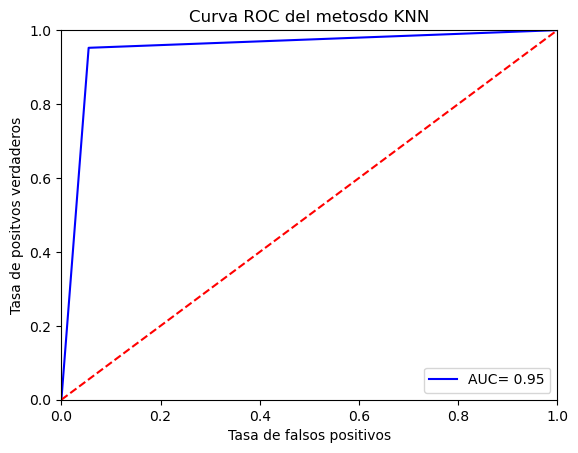

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics  import auc

y_scores=knn.predict_proba(x_test)

fpr, tpr, threshold=roc_curve(y_test,y_scores[:,1])
#fpr= False positive rate, tpr=True Positive rate
roc_auc=auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC= %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("Tasa de positvos verdaderos")
plt.xlabel("Tasa de falsos positivos")
plt.title("Curva ROC del metosdo KNN")
plt.show()